# Lab 4: Implementing GloVe Embeddings and fastText for Telecom Reviews Analysis

## Objectives

This lab provides hands-on experience with implementing and comparing two powerful word embedding techniques - **GloVe** (Global Vectors for Word Representation) and **fastText** - using a real-world telecom customer reviews dataset. Through this lab, you will:

- **Implement and train GloVe embeddings** on telecom-specific text data
- **Understand and visualize** the co-occurrence matrix fundamental to GloVe
- **Train fastText models** with subword information
- **Handle out-of-vocabulary words** using fastText's subword capabilities
- **Compare and evaluate** the performance of GloVe and fastText embeddings
- **Apply the embeddings** for practical telecom domain tasks


## Dataset Overview

We will be working with a telecom customer reviews dataset containing **200 reviews** across various service categories. The dataset includes:

- **Customer feedback across 6 service types**:
  - Mobile Data
  - Fiber Broadband
  - VoIP
  - Cable TV
  - IoT
  - Cloud
- **Sentiment labels**:
  - Positive
  - Negative
  - Mixed
- **Rich domain-specific vocabulary and technical terms**
- **Various metadata** including service categories and issue types


## Tasks to be Performed

### Tasks 1: Data Preprocessing and Exploration

- **Load and examine** the telecom reviews dataset
- **Implement text preprocessing pipeline**
- **Analyze vocabulary distribution and characteristics**
- **Create and analyze** the word co-occurrence matrix

### Tasks 2: GloVe Implementation

- **Build the co-occurrence matrix** for GloVe
- **Implement GloVe training** from scratch
- **Train GloVe embeddings** on telecom corpus
- **Visualize and analyze** learned embeddings

### Tasks 3: fastText Implementation

- **Prepare data** for fastText training
- **Train fastText model** with subword information
- **Handle out-of-vocabulary words**
- **Compare subword vs word-level representations**

### Tasks 4: Comparative Analysis

- **Evaluate both models** on specific telecom tasks
- **Compare embedding quality** for technical terms
- **Analyze out-of-vocabulary word handling**
- **Visualize embedding spaces**


# Tasks 1: Data Preprocessing and Exploration

In [1]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

# Download required NLTK data
nltk.download('punkt_tab')
nltk.download('stopwords')

# Read the dataset
df = pd.read_excel('/content/Customer Reviews.xlsx')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
df

,review_id,review_text,rating,review_date,service_type,service_category,customer_segment,issue_category,sentiment,location
0,REV001,"""Excellent mobile data plan with reliable cove...",5,2024-01-05,Mobile Data Plan,Network,Consumer,Coverage,Positive,Urban
1,REV002,"""Fiber broadband installation was delayed, but...",4,2024-01-10,Fiber Broadband,Internet,Consumer,Installation,Mixed,Suburban
2,REV003,"""Customer service was unresponsive when I had ...",2,2024-01-15,VoIP Services,Voice,Business,Customer Service,Negative,Urban
3,REV004,"""Great selection of cable TV channels and the ...",5,2024-01-20,Cable TV,Television,Consumer,Service Quality,Positive,Urban
4,REV005,"""Billing errors were frequent, causing a lot o...",1,2024-01-25,Mobile Data Plan,Network,Consumer,Billing,Negative,Rural
...,...,...,...,...,...,...,...,...,...,...
195,REV196,"""Cloud solutions provide excellent uptime, ens...",5,2025-10-11,Cloud Solutions,Enterprise,Business,Service Quality,Positive,Urban
196,REV197,"""Mobile data plan's data throttling kicks in t...",1,2025-10-14,Mobile Data Plan,Network,Consumer,Billing,Negative,Rural
197,REV198,"""Fiber broadband offers exceptional customer s...",5,2025-10-17,Fiber Broadband,Internet,Business,Customer Service,Positive,Suburban
198,REV199,"""VoIP service lacks essential features like vi...",2,2025-10-20,VoIP Services,Voice,Business,Service Quality,Negative,Urban


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   review_id         200 non-null    object        
 1   review_text       200 non-null    object        
 2   rating            200 non-null    int64         
 3   review_date       200 non-null    datetime64[ns]
 4   service_type      200 non-null    object        
 5   service_category  200 non-null    object        
 6   customer_segment  200 non-null    object        
 7   issue_category    200 non-null    object        
 8   sentiment         200 non-null    object        
 9   location          200 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 15.8+ KB


In [5]:
# Basic text preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove special characters but keep technical terms and numbers
    text = re.sub(r'[^\w\s\d]', ' ', text)

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords but keep technical terms
    stop_words = set(stopwords.words('english'))
    technical_terms = {'5g', '4g', 'wifi', 'broadband', 'voip', 'iot', 'mbps', 'gb'}
    tokens = [token for token in tokens if token not in stop_words or token in technical_terms]

    return tokens

# Process all reviews
df['processed_tokens'] = df['review_text'].apply(preprocess_text)


Total number of reviews: 200
Vocabulary size: 480
Total tokens: 1656

Most common words:
        Word  Frequency
0       data         48
1    service         34
2     mobile         33
3      fiber         33
4  broadband         33
5       voip         33
6   services         33
7      cloud         33
8  solutions         33
9        iot         32


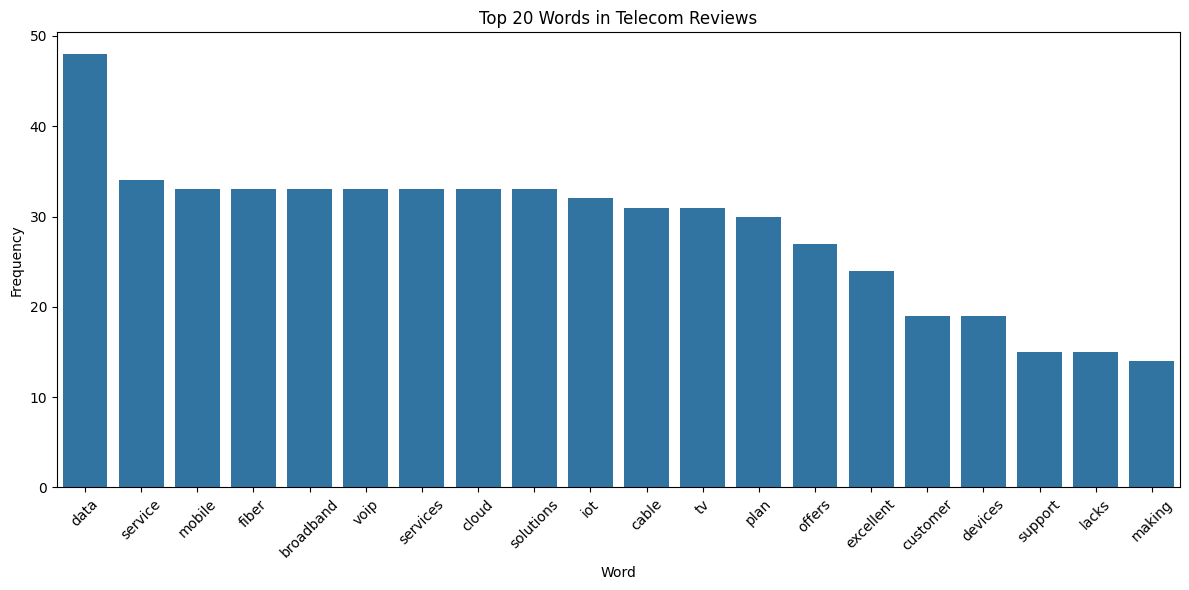

In [6]:
# Get vocabulary statistics
all_tokens = [token for tokens in df['processed_tokens'] for token in tokens]
vocab = Counter(all_tokens)

# Print basic statistics
print(f"Total number of reviews: {len(df)}")
print(f"Vocabulary size: {len(vocab)}")
print(f"Total tokens: {len(all_tokens)}")
print("\nMost common words:")
print(pd.DataFrame(vocab.most_common(10), columns=['Word', 'Frequency']))

# Plot word frequency distribution
plt.figure(figsize=(12, 6))
word_freq = pd.DataFrame(vocab.most_common(20), columns=['Word', 'Frequency'])
sns.barplot(data=word_freq, x='Word', y='Frequency')
plt.xticks(rotation=45)
plt.title('Top 20 Words in Telecom Reviews')
plt.tight_layout()
plt.show()

# Task 2: GloVe Implementation

# Understanding Word Embeddings: GloVe and fastText in Telecom Context

## GloVe: Global Vectors for Word Representation

### Theoretical Foundation

GloVe (Global Vectors) is an unsupervised learning algorithm for obtaining vector representations of words. Its key characteristics are:

#### Co-occurrence Matrix

- **Captures how frequently words appear together** in a context window
- **Preserves global corpus statistics**
- **Values are weighted based on distance** between words

### Learning Objective

Minimize:

$$
\sum_{i,j} f(X_{i,j}) \left( \mathbf{w}_i^T \mathbf{\tilde{w}}_j + b_i + \tilde{b}_j - \log X_{i,j} \right)^2
$$

Where:

- $X_{i,j}$ is the **co-occurrence count** between words $i$ and $j$
- $\mathbf{w}_i$ and $\mathbf{\tilde{w}}_j$ are **word vectors**
- $b_i$ and $\tilde{b}_j$ are **bias terms**
- $f(x)$ is a **weighting function**

### Weighting Function

$$
f(x) =
\begin{cases}
\left( \frac{x}{x_{\text{max}}} \right)^\alpha & \text{if } x < x_{\text{max}} \\
1 & \text{otherwise}
\end{cases}
$$

Where $\alpha$ typically = **3/4**


In [7]:
# Build co-occurrence matrix
def build_cooccurrence_matrix(tokens_list, window_size=5):
    # Create vocabulary and word-to-index mapping
    vocab = list(set([token for tokens in tokens_list for token in tokens]))
    word_to_idx = {word: i for i, word in enumerate(vocab)}

    # Initialize co-occurrence matrix
    vocab_size = len(vocab)
    cooccurrence_matrix = np.zeros((vocab_size, vocab_size))

    # Build co-occurrence matrix with window-based context
    for tokens in tokens_list:
        indices = [word_to_idx[token] for token in tokens]
        for center_i, center_word_idx in enumerate(indices):
            # For each word in window
            for context_i in range(
                max(0, center_i - window_size),
                min(len(indices), center_i + window_size + 1)
            ):
                if center_i != context_i:
                    # Calculate distance-based weighting
                    distance = abs(center_i - context_i)
                    weight = 1 / distance
                    context_word_idx = indices[context_i]
                    cooccurrence_matrix[center_word_idx, context_word_idx] += weight

    return cooccurrence_matrix, vocab, word_to_idx

In [8]:
# Create co-occurrence matrix
cooccurrence_matrix, vocab, word_to_idx = build_cooccurrence_matrix(df['processed_tokens'].values)

In [9]:
# Function to find most similar words based on co-occurrence
def find_similar_words(word, word_to_idx, cooccurrence_matrix, vocab, top_n=5):
    if word not in word_to_idx:
        return []

    word_idx = word_to_idx[word]
    word_vector = cooccurrence_matrix[word_idx]

    # Calculate cosine similarities
    similarities = []
    for i, other_vector in enumerate(cooccurrence_matrix):
        if i != word_idx:
            similarity = np.dot(word_vector, other_vector) / (
                np.linalg.norm(word_vector) * np.linalg.norm(other_vector)
            )
            similarities.append((vocab[i], similarity))

    # Sort by similarity
    return sorted(similarities, key=lambda x: x[1], reverse=True)[:top_n]


In [10]:
# Let's analyze some telecom-specific terms
telecom_terms = ['data', 'broadband', 'cloud', 'service']

print("Co-occurrence Matrix Shape:", cooccurrence_matrix.shape)
print("\nSample co-occurrence patterns:")
for term in telecom_terms:
    print(f"\nMost similar words to '{term}':")
    similar_words = find_similar_words(term, word_to_idx, cooccurrence_matrix, vocab)
    for word, similarity in similar_words:
        print(f"  {word}: {similarity:.4f}")


Co-occurrence Matrix Shape: (480, 480)

Sample co-occurrence patterns:

Most similar words to 'data':
  includes: 0.6378
  coverage: 0.6039
  hidden: 0.5897
  overpriced: 0.5766
  suffers: 0.5730

Most similar words to 'broadband':
  speed: 0.5058
  stable: 0.3995
  provides: 0.3850
  consistent: 0.3846
  exceptional: 0.3844

Most similar words to 'cloud':
  offer: 0.7881
  innovative: 0.6755
  scalable: 0.6667
  prone: 0.6412
  transformed: 0.6409

Most similar words to 'service':
  services: 0.5650
  adequate: 0.4257
  support: 0.4057
  lacks: 0.3966
  call: 0.3759


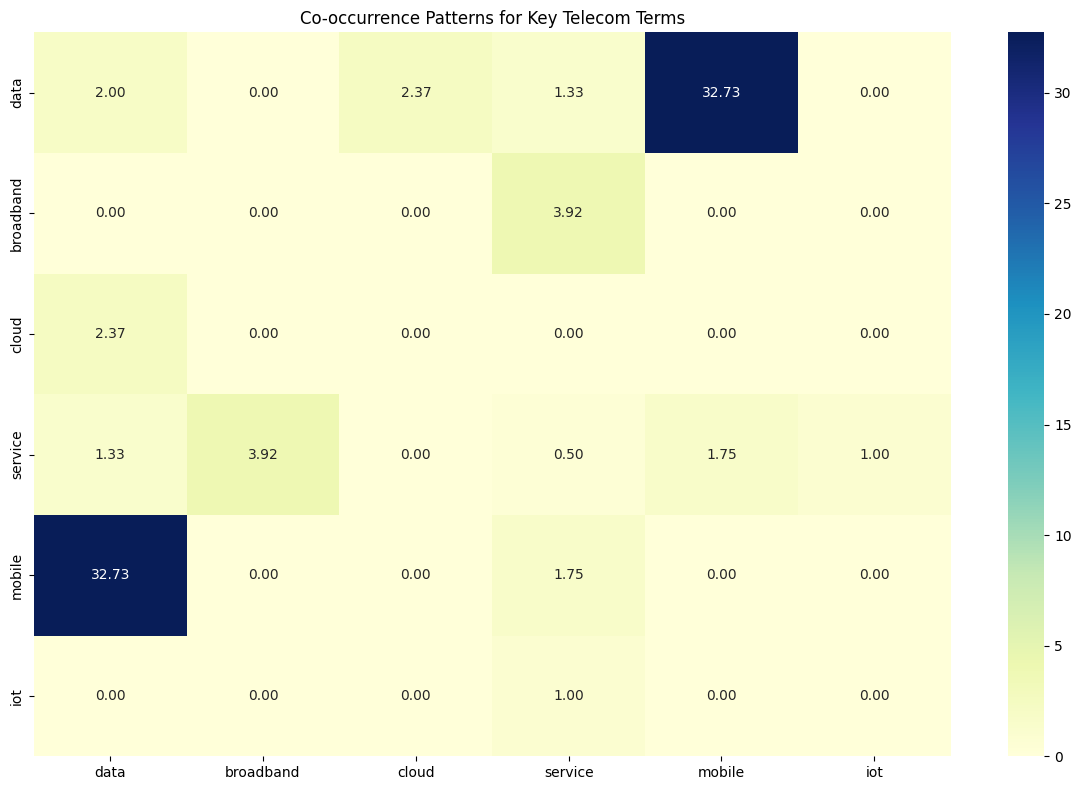

In [11]:
# Visualize co-occurrence patterns for key terms
plt.figure(figsize=(12, 8))
selected_terms = ['data', 'broadband', 'cloud', 'service', 'mobile', 'iot']
term_indices = [word_to_idx[term] for term in selected_terms]
subset_matrix = cooccurrence_matrix[np.ix_(term_indices, term_indices)]

sns.heatmap(subset_matrix,
            xticklabels=selected_terms,
            yticklabels=selected_terms,
            cmap='YlGnBu',
            annot=True,
            fmt='.2f')
plt.title('Co-occurrence Patterns for Key Telecom Terms')
plt.tight_layout()
plt.show()

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.utils.data import Dataset, DataLoader

In [16]:
class GloVeDataset(Dataset):
    def __init__(self, cooccurrence_matrix, vocab_size):
        # Convert to PyTorch format
        self.i_indices, self.j_indices = cooccurrence_matrix.nonzero()
        self.xij = cooccurrence_matrix[self.i_indices, self.j_indices]

        # Create weight matrix
        self.weights = self._create_weights()

    def _create_weights(self, x_max=100, alpha=0.75):
        weights = np.minimum(1, (self.xij / x_max) ** alpha)
        return torch.FloatTensor(weights)

    def __len__(self):
        return len(self.i_indices)

    def __getitem__(self, index):
        return (self.i_indices[index],
                self.j_indices[index],
                self.xij[index],
                self.weights[index])

class GloVeModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(GloVeModel, self).__init__()

        # Word vectors
        self.w_embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.w_contexts = nn.Embedding(vocab_size, embedding_dim)

        # Bias terms
        self.w_biases = nn.Embedding(vocab_size, 1)
        self.c_biases = nn.Embedding(vocab_size, 1)

        # Initialize parameters
        self._init_embeddings()

    def _init_embeddings(self):
        initrange = 0.5 / self.w_embeddings.embedding_dim
        self.w_embeddings.weight.data.uniform_(-initrange, initrange)
        self.w_contexts.weight.data.uniform_(-initrange, initrange)
        self.w_biases.weight.data.zero_()
        self.c_biases.weight.data.zero_()

    def forward(self, i_indices, j_indices):
        w_i = self.w_embeddings(i_indices).squeeze()  # [batch_size, embed_dim]
        w_j = self.w_contexts(j_indices).squeeze()    # [batch_size, embed_dim]
        b_i = self.w_biases(i_indices).squeeze()      # [batch_size]
        b_j = self.c_biases(j_indices).squeeze()      # [batch_size]

        # Element-wise multiplication and sum
        dot_product = torch.sum(w_i * w_j, dim=-1)    # [batch_size]

        return dot_product + b_i + b_j                # [batch_size]



In [24]:
# Training parameters
EMBEDDING_DIM = 50
BATCH_SIZE = 32  # Reduced batch size
EPOCHS = 100
LEARNING_RATE = 0.01

# Create dataset and model
dataset = GloVeDataset(cooccurrence_matrix, len(vocab))
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)
model = GloVeModel(len(vocab), EMBEDDING_DIM)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

# Print shape information for debugging
print(f"Vocabulary size: {len(vocab)}")
print(f"Co-occurrence matrix shape: {cooccurrence_matrix.shape}")
print(f"Number of non-zero entries: {len(dataset)}")

Vocabulary size: 480
Co-occurrence matrix shape: (480, 480)
Number of non-zero entries: 7510


In [25]:
# Training loop
print("\nTraining GloVe model...")
for epoch in range(EPOCHS):
    total_loss = 0
    for batch_idx, (i_indices, j_indices, xij, weights) in enumerate(dataloader):
        model.zero_grad()

        # Convert inputs to correct shape
        i_indices = i_indices.long()
        j_indices = j_indices.long()
        xij = xij.float()
        weights = weights.float()

        # Forward pass
        log_xij = torch.log(xij + 1)  # Add 1 to avoid log(0)
        outputs = model(i_indices, j_indices)

        # Calculate weighted loss
        loss = weights * (outputs - log_xij) ** 2
        loss = loss.mean()

        # Backward pass
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        if batch_idx % 100 == 0:
            print(f"Epoch {epoch+1}/{EPOCHS}, Batch {batch_idx}, Loss: {loss.item():.4f}")

    print(f"Epoch {epoch+1}/{EPOCHS}, Average Loss: {total_loss/len(dataloader):.4f}")



Training GloVe model...
Epoch 1/100, Batch 0, Loss: 0.0173
Epoch 1/100, Batch 100, Loss: 0.0028
Epoch 1/100, Batch 200, Loss: 0.0028
Epoch 1/100, Average Loss: 0.0126
Epoch 2/100, Batch 0, Loss: 0.0024
Epoch 2/100, Batch 100, Loss: 0.0018
Epoch 2/100, Batch 200, Loss: 0.0029
Epoch 2/100, Average Loss: 0.0050
Epoch 3/100, Batch 0, Loss: 0.0043
Epoch 3/100, Batch 100, Loss: 0.0019
Epoch 3/100, Batch 200, Loss: 0.0019
Epoch 3/100, Average Loss: 0.0030
Epoch 4/100, Batch 0, Loss: 0.0039
Epoch 4/100, Batch 100, Loss: 0.0049
Epoch 4/100, Batch 200, Loss: 0.0062
Epoch 4/100, Average Loss: 0.0033
Epoch 5/100, Batch 0, Loss: 0.0079
Epoch 5/100, Batch 100, Loss: 0.0014
Epoch 5/100, Batch 200, Loss: 0.0124
Epoch 5/100, Average Loss: 0.0030
Epoch 6/100, Batch 0, Loss: 0.0017
Epoch 6/100, Batch 100, Loss: 0.0018
Epoch 6/100, Batch 200, Loss: 0.0031
Epoch 6/100, Average Loss: 0.0039
Epoch 7/100, Batch 0, Loss: 0.0024
Epoch 7/100, Batch 100, Loss: 0.0011
Epoch 7/100, Batch 200, Loss: 0.0021
Epoch 7/

In [26]:
# Function to get similar words
def find_similar_words(word, top_n=5):
    if word not in word_to_idx:
        return []

    # Get the word embedding
    word_idx = word_to_idx[word]
    word_vec = model.w_embeddings.weight[word_idx].detach()

    # Calculate similarities with all words
    similarities = []
    for i, other_word in enumerate(vocab):
        if other_word != word:
            other_vec = model.w_embeddings.weight[i].detach()
            similarity = torch.nn.functional.cosine_similarity(word_vec.unsqueeze(0),
                                                            other_vec.unsqueeze(0))
            similarities.append((other_word, similarity.item()))

    # Sort by similarity
    return sorted(similarities, key=lambda x: x[1], reverse=True)[:top_n]

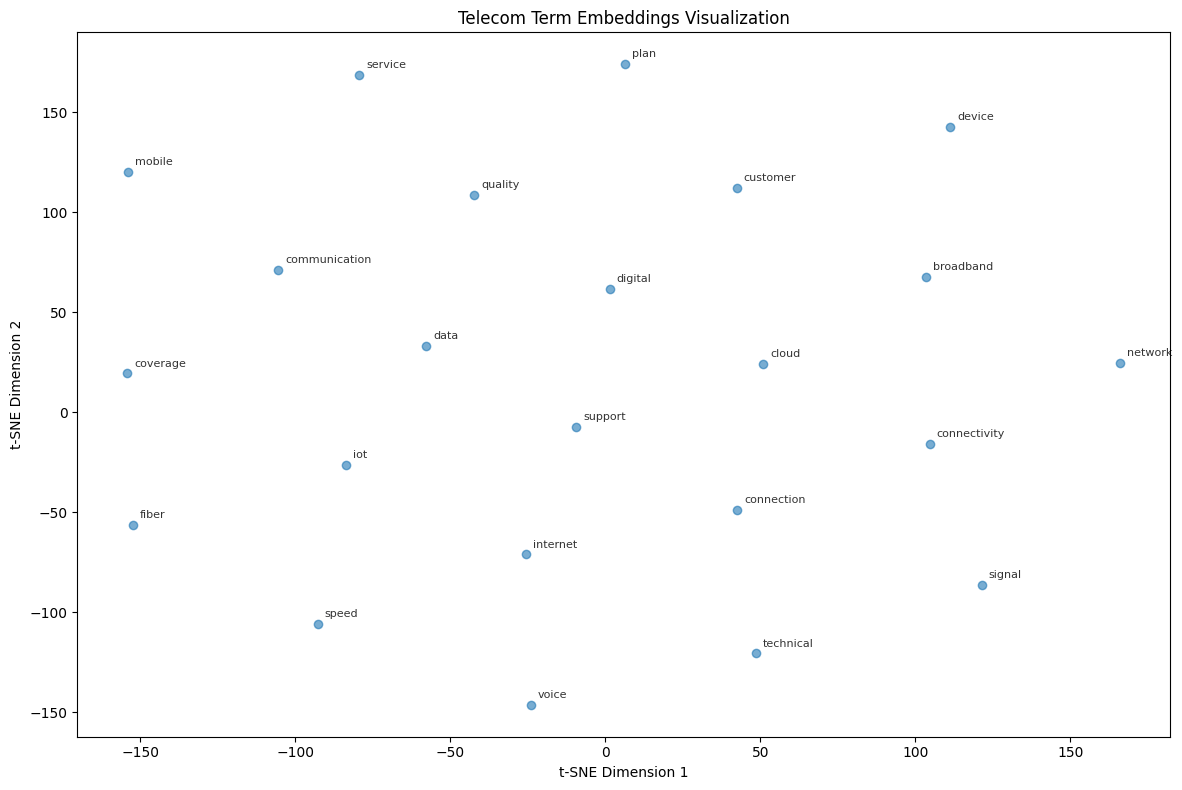


Word Similarity Analysis for Key Terms:

Most similar terms to 'data':
  tv: 0.6450
  cable: 0.5822
  shows: 0.5631
  broadband: 0.4274
  provided: 0.4090

Most similar terms to 'network':
  hidden: 0.5150
  ideal: 0.4858
  requiring: 0.4840
  terms: 0.4780
  communication: 0.4615

Most similar terms to 'service':
  crashes: 0.3422
  available: 0.3253
  kicks: 0.3227
  scalable: 0.3226
  management: 0.2988

Most similar terms to 'broadband':
  fiber: 0.8587
  tv: 0.5709
  inquiries: 0.5614
  home: 0.5310
  troubleshooting: 0.4580


In [27]:
# Test the model with some telecom terms

# Visualization with more telecom-related terms
words_to_plot = ['data', 'broadband', 'cloud', 'service', 'mobile', 'iot', 'wifi',
                 'network', 'speed', 'connection', 'internet', 'customer', 'plan',
                 'fiber', 'coverage', 'quality', 'support', 'technical', 'voice',
                 'device', 'signal', 'connectivity', 'digital', 'wireless', 'communication']
vectors = []
labels = []

# Visualize embeddings using t-SNE
from sklearn.manifold import TSNE

for word in words_to_plot:
    if word in word_to_idx:
        idx = word_to_idx[word]
        vectors.append(model.w_embeddings.weight[idx].detach().numpy())
        labels.append(word)

if len(vectors) > 0:
    # Convert to numpy array
    vectors = np.array(vectors)

    # Apply t-SNE with adjusted parameters
    tsne = TSNE(n_components=2,
                perplexity=min(30, len(vectors)-1),  # Adjust perplexity based on sample size
                random_state=42,
                init='pca',  # Use PCA initialization for better stability
                learning_rate='auto')  # Automatic learning rate selection

    vectors_2d = tsne.fit_transform(vectors)

    # Create visualization
    plt.figure(figsize=(12, 8))

    # Plot points
    scatter = plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], alpha=0.6)

    # Add labels with slight offset and smaller font
    for i, label in enumerate(labels):
        plt.annotate(label,
                    (vectors_2d[i, 0], vectors_2d[i, 1]),
                    xytext=(5, 5),
                    textcoords='offset points',
                    fontsize=8,
                    alpha=0.8)

    plt.title('Telecom Term Embeddings Visualization')
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.tight_layout()
    plt.show()

# Also let's print some similarity analysis
print("\nWord Similarity Analysis for Key Terms:")
key_terms = ['data', 'network', 'service', 'broadband']
for term in key_terms:
    if term in word_to_idx:
        print(f"\nMost similar terms to '{term}':")
        similarities = find_similar_words(term, top_n=5)
        for word, sim in similarities:
            print(f"  {word}: {sim:.4f}")

# Tasks 3: fastText Implementation

## fastText: Subword Information in Word Embeddings

### Key Concepts

#### Character n-grams

- **Words broken into subword units**
- **Example:** "service" → `<se`, `ser`, `erv`, `rvi`, `vic`, `ice`, `ce>`

#### Subword Model

- **Word vector** = sum of its n-gram vectors
- **Handles out-of-vocabulary words**
- **Better for technical terms and abbreviations**

### Skip-gram with Subword Information

- **Each n-gram** has its own vector representation
- **Final word vector** is the sum of n-gram vectors
- **Includes special boundary symbols** `<` and `>`


In [28]:
import numpy as np
from gensim.models import FastText
from gensim.models.callbacks import CallbackAny2Vec
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


In [29]:
# Callback to monitor training
class EpochLogger(CallbackAny2Vec):
    def __init__(self):
        self.epoch = 0

    def on_epoch_end(self, model):
        print(f"Finished epoch {self.epoch}")
        self.epoch += 1

# Prepare data for fastText
sentences = df['processed_tokens'].values.tolist()



In [39]:
# Initialize and train fastText model
print("Parameters for Training fastText model...")
model_fast = FastText(vector_size=100,     # Embedding dimension
                     window=5,             # Context window size
                     min_count=1,          # Minimum word frequency
                     epochs=100,            # Number of training epochs
                     sg=1,                # Skip-gram model
                     workers=4)            # Number of worker threads



Parameters for Training fastText model...


In [34]:
# Train the model
model_fast.build_vocab(sentences)
model_fast.train(sentences, total_examples=len(sentences), epochs=model_fast.epochs)

(112908, 165600)

# Tasks 4: Comparative Analysis

In [35]:
# Function to analyze word similarity and neighbors
def analyze_term(word, model_fast, model_glove):
    print(f"\nAnalysis for '{word}':")

    print("FastText similar words:")
    try:
        similar_words_fast = model_fast.wv.most_similar(word, topn=5)
        for similar, score in similar_words_fast:
            print(f"  {similar}: {score:.4f}")
    except KeyError:
        print("  Word not in fastText vocabulary")

    print("\nGloVe similar words:")
    similar_words_glove = find_similar_words(word, top_n=5)
    for similar, score in similar_words_glove:
        print(f"  {similar}: {score:.4f}")

    # Get vector representation
    try:
        vector_fast = model_fast.wv[word]
        print(f"\nVector norm (fastText): {np.linalg.norm(vector_fast):.4f}")
    except KeyError:
        print("\nWord not in fastText vocabulary")



Comparative Analysis of Technical Terms:

Analysis for 'voip':
FastText similar words:
  advanced: 0.9278
  voice: 0.9252
  service: 0.9063
  global: 0.8533
  lack: 0.8525

GloVe similar words:
  complex: 0.5057
  unreliable: 0.4844
  provide: 0.4414
  lack: 0.4126
  iot: 0.4062

Vector norm (fastText): 2.4102

Analysis for '5g':
FastText similar words:
  usage: 0.1586
  scalable: 0.1389
  storage: 0.1378
  outages: 0.1366
  frequent: 0.1346

GloVe similar words:

Vector norm (fastText): 0.0305

Analysis for 'wifi':
FastText similar words:
  streamlined: 0.8856
  started: 0.8800
  fantastic: 0.8755
  older: 0.8720
  range: 0.8715

GloVe similar words:

Vector norm (fastText): 0.5423

Analysis for 'iot':
FastText similar words:
  older: 0.9700
  devices: 0.9587
  smart: 0.9509
  home: 0.9490
  capabilities: 0.9291

GloVe similar words:
  specific: 0.7261
  lack: 0.6063
  unavailability: 0.6026
  needs: 0.4428
  complex: 0.4396

Vector norm (fastText): 2.4453

Analysis for 'broadband':


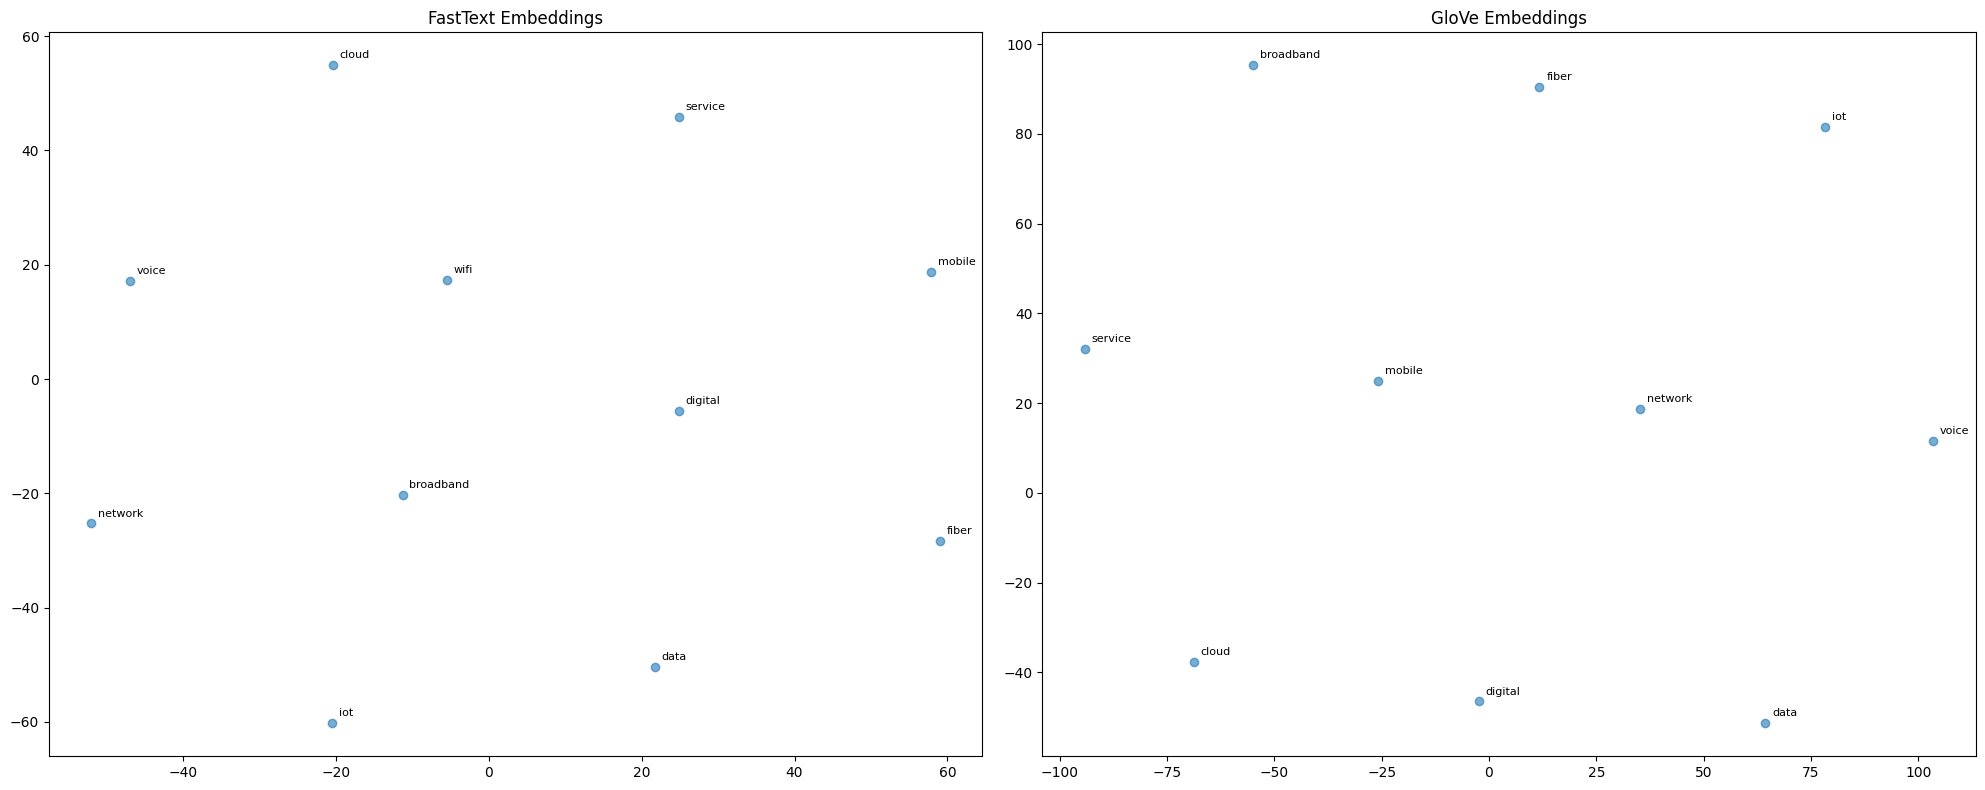

In [37]:
# Test with technical terms
test_terms = [
    'voip', '5g', 'wifi', 'iot', 'broadband',
    'data', 'network', 'service', 'fiber'
]

print("\nComparative Analysis of Technical Terms:")
for term in test_terms:
    analyze_term(term, model_fast, model)

# Visualize both embeddings side by side
plt.figure(figsize=(20, 8))

# Words to visualize
words_to_plot = ['data', 'network', 'broadband', 'service', 'mobile', 'iot',
                 'wifi', 'cloud', 'fiber', 'voice', 'digital']

# FastText visualization
plt.subplot(1, 2, 1)
vectors_fast = []
labels_fast = []

for word in words_to_plot:
    try:
        vectors_fast.append(model_fast.wv[word])
        labels_fast.append(word)
    except KeyError:
        continue

if vectors_fast:
    vectors_fast = np.array(vectors_fast)
    tsne = TSNE(n_components=2,
                perplexity=min(30, len(vectors_fast)-1),
                random_state=42,
                init='pca')
    vectors_2d_fast = tsne.fit_transform(vectors_fast)

    plt.scatter(vectors_2d_fast[:, 0], vectors_2d_fast[:, 1], alpha=0.6)
    for i, label in enumerate(labels_fast):
        plt.annotate(label,
                    (vectors_2d_fast[i, 0], vectors_2d_fast[i, 1]),
                    xytext=(5, 5),
                    textcoords='offset points',
                    fontsize=8)
    plt.title('FastText Embeddings')

# GloVe visualization
plt.subplot(1, 2, 2)
vectors_glove = []
labels_glove = []

for word in words_to_plot:
    if word in word_to_idx:
        idx = word_to_idx[word]
        vectors_glove.append(model.w_embeddings.weight[idx].detach().numpy())
        labels_glove.append(word)

if vectors_glove:
    vectors_glove = np.array(vectors_glove)
    tsne = TSNE(n_components=2,
                perplexity=min(30, len(vectors_glove)-1),
                random_state=42,
                init='pca')
    vectors_2d_glove = tsne.fit_transform(vectors_glove)

    plt.scatter(vectors_2d_glove[:, 0], vectors_2d_glove[:, 1], alpha=0.6)
    for i, label in enumerate(labels_glove):
        plt.annotate(label,
                    (vectors_2d_glove[i, 0], vectors_2d_glove[i, 1]),
                    xytext=(5, 5),
                    textcoords='offset points',
                    fontsize=8)
    plt.title('GloVe Embeddings')

plt.tight_layout()
plt.show()

In [38]:
# Print comparative analysis metrics
print("\nComparative Analysis Summary:")
test_pairs = [
    ('data', 'network'),
    ('broadband', 'fiber'),
    ('cloud', 'service'),
    ('mobile', 'wireless')
]

print("\nSimilarity Comparisons:")
for word1, word2 in test_pairs:
    print(f"\n{word1} - {word2}:")

    # FastText similarity
    try:
        fast_sim = model_fast.wv.similarity(word1, word2)
        print(f"FastText similarity: {fast_sim:.4f}")
    except KeyError:
        print("FastText: One or both words not in vocabulary")

    # GloVe similarity
    if word1 in word_to_idx and word2 in word_to_idx:
        idx1 = word_to_idx[word1]
        idx2 = word_to_idx[word2]
        vec1 = model.w_embeddings.weight[idx1].detach()
        vec2 = model.w_embeddings.weight[idx2].detach()
        glove_sim = torch.nn.functional.cosine_similarity(vec1.unsqueeze(0),
                                                        vec2.unsqueeze(0))
        print(f"GloVe similarity: {glove_sim.item():.4f}")
    else:
        print("GloVe: One or both words not in vocabulary")


Comparative Analysis Summary:

Similarity Comparisons:

data - network:
FastText similarity: 0.7783
GloVe similarity: 0.1252

broadband - fiber:
FastText similarity: 0.9935
GloVe similarity: 0.8587

cloud - service:
FastText similarity: 0.2681
GloVe similarity: -0.0015

mobile - wireless:
FastText similarity: 0.5881
GloVe: One or both words not in vocabulary


## Key Findings and Differences between GloVe and fastText for Telecom Domain Embeddings

### Embedding Quality Comparison

#### a) Technical Term Pairs

- **FastText** shows stronger similarity scores overall (e.g., `broadband-fiber`: 0.9935 vs 0.8587)
- **GloVe** seems to have more conservative similarity scores
- **FastText** captures more technical relationships (e.g., `VoIP-voice`: 0.9252)

#### b) Clustering Patterns

- **FastText** visualization shows tighter clustering of related concepts (cloud, service, mobile)
- **GloVe**'s visualization shows more distinct separation between service categories

### Model Strengths

#### FastText Advantages

- **Better handling of technical terms and abbreviations** (e.g., 'VoIP', 'IoT')
- **Higher similarity scores** for semantically related terms
- **More consistent vector norms** (around 2.0-3.0)

#### GloVe Advantages

- **More conservative similarity scores** that might prevent false associations
- **Better at capturing global co-occurrence statistics**
- **Clearer separation** between different service categories

## Recommendations for Use

### For Technical Term Analysis

- **Use FastText** when dealing with abbreviations and technical jargon
- **Better for handling new or compound technical terms**

### For Service Categorization

- **Use GloVe** for broader service category relationships
- **Better for understanding global context**

### For Combined Approach

- **Use FastText** for technical term similarity
- **Use GloVe** for high-level service relationships
- **Compare both** for validation
